In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

### Distribution of cases and deaths in 5 continents

In [129]:
covid_world = pd.read_excel("files/data.xlsx", sheet_name="Sheet1")
covid_world_continent = covid_world.groupby(["continent", "indicator"]).sum().reset_index()
covid_world_continent.head()

,continent,indicator,population,weekly_count,rate_14_day,cumulative_count
0,Africa,cases,233776695204,16936690,170358.570278,555500688
1,Africa,deaths,233776695204,433680,27808.775765,14159606
2,America,cases,188555324786,186240958,615532.478245,6781676700
3,America,deaths,188555324786,4565960,123251.555850,182106822
4,Asia,cases,846460431224,138611710,351329.696105,4171139936


### Barplots for cases and deaths in different continents

[Text(0.5, 1.0, 'Death numbers in different continents'),
 Text(0, 0.5, 'Total numbers')]

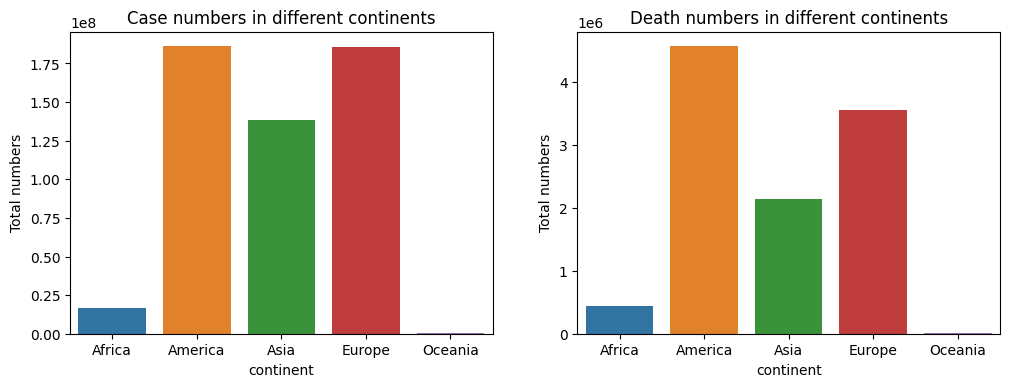

In [130]:
fig, axes = plt.subplots(1,2, dpi=100, figsize=(12, 4))
sns.barplot(data=covid_world_continent, x=covid_world_continent["continent"], y=covid_world_continent["weekly_count"][covid_world_continent["indicator"]=="cases"], ax=axes[0]).set(title="Case numbers in different continents", ylabel="Total numbers")
sns.barplot(data=covid_world_continent, x=covid_world_continent["continent"], y=covid_world_continent["weekly_count"][covid_world_continent["indicator"]=="deaths"], ax=axes[1]).set(title="Death numbers in different continents", ylabel="Total numbers")

- The Covid cases and deaths in America and Europe are obviously higher than other continents.

### Barplots for fatality in different continents

[Text(0.5, 1.0, 'Covid fatality rate in different continents'),
 Text(0.5, 0, 'Continents'),
 Text(0, 0.5, 'Covid fatality rate')]

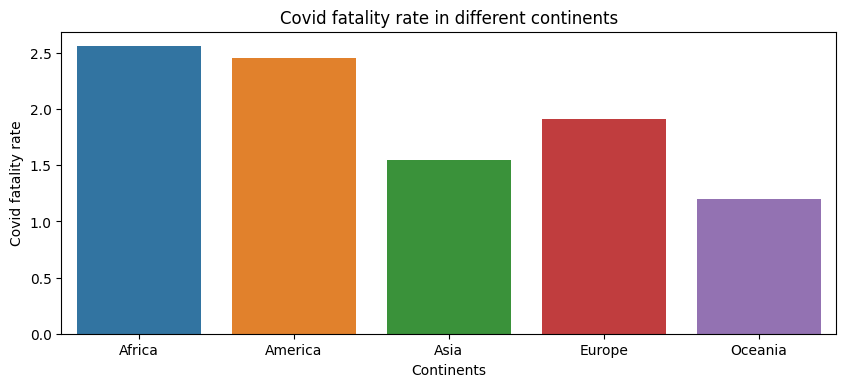

In [131]:
covid_fatality = covid_world_continent["weekly_count"][covid_world_continent["indicator"]=="deaths"].reset_index()/covid_world_continent["weekly_count"][covid_world_continent["indicator"]=="cases"].reset_index()*100
covid_fatality["index"] = (covid_fatality["index"]).astype(str)
# Create a new dataframe with continents and fatalities
covid_fatality["index"]="Africa","America","Asia","Europe","Oceania"
fig = plt.subplots(dpi=100, figsize=(10, 4))
sns.barplot(data=covid_fatality, x=covid_fatality["index"], y=covid_fatality["weekly_count"]).set(title="Covid fatality rate in different continents", xlabel="Continents", ylabel="Covid fatality rate")

- The fatality rate in Africa is higher than other continents. The reason may due to the poor medical conditions.